In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report


First step: Read the CSV file, then print the first 5 rows to check if any modifications are needed, such as applying one-hot encoding.

Second step: Exploratory Data Analysis (EDA)

2.1) Print info() to check the data types of the features.

2.2) Check for any missing data.

 Note: In algorithms such as Logistic Regression or Neural Networks, a value of 1 activates the weight associated with a feature, whereas a value of 0 indicates that the feature has no effect.
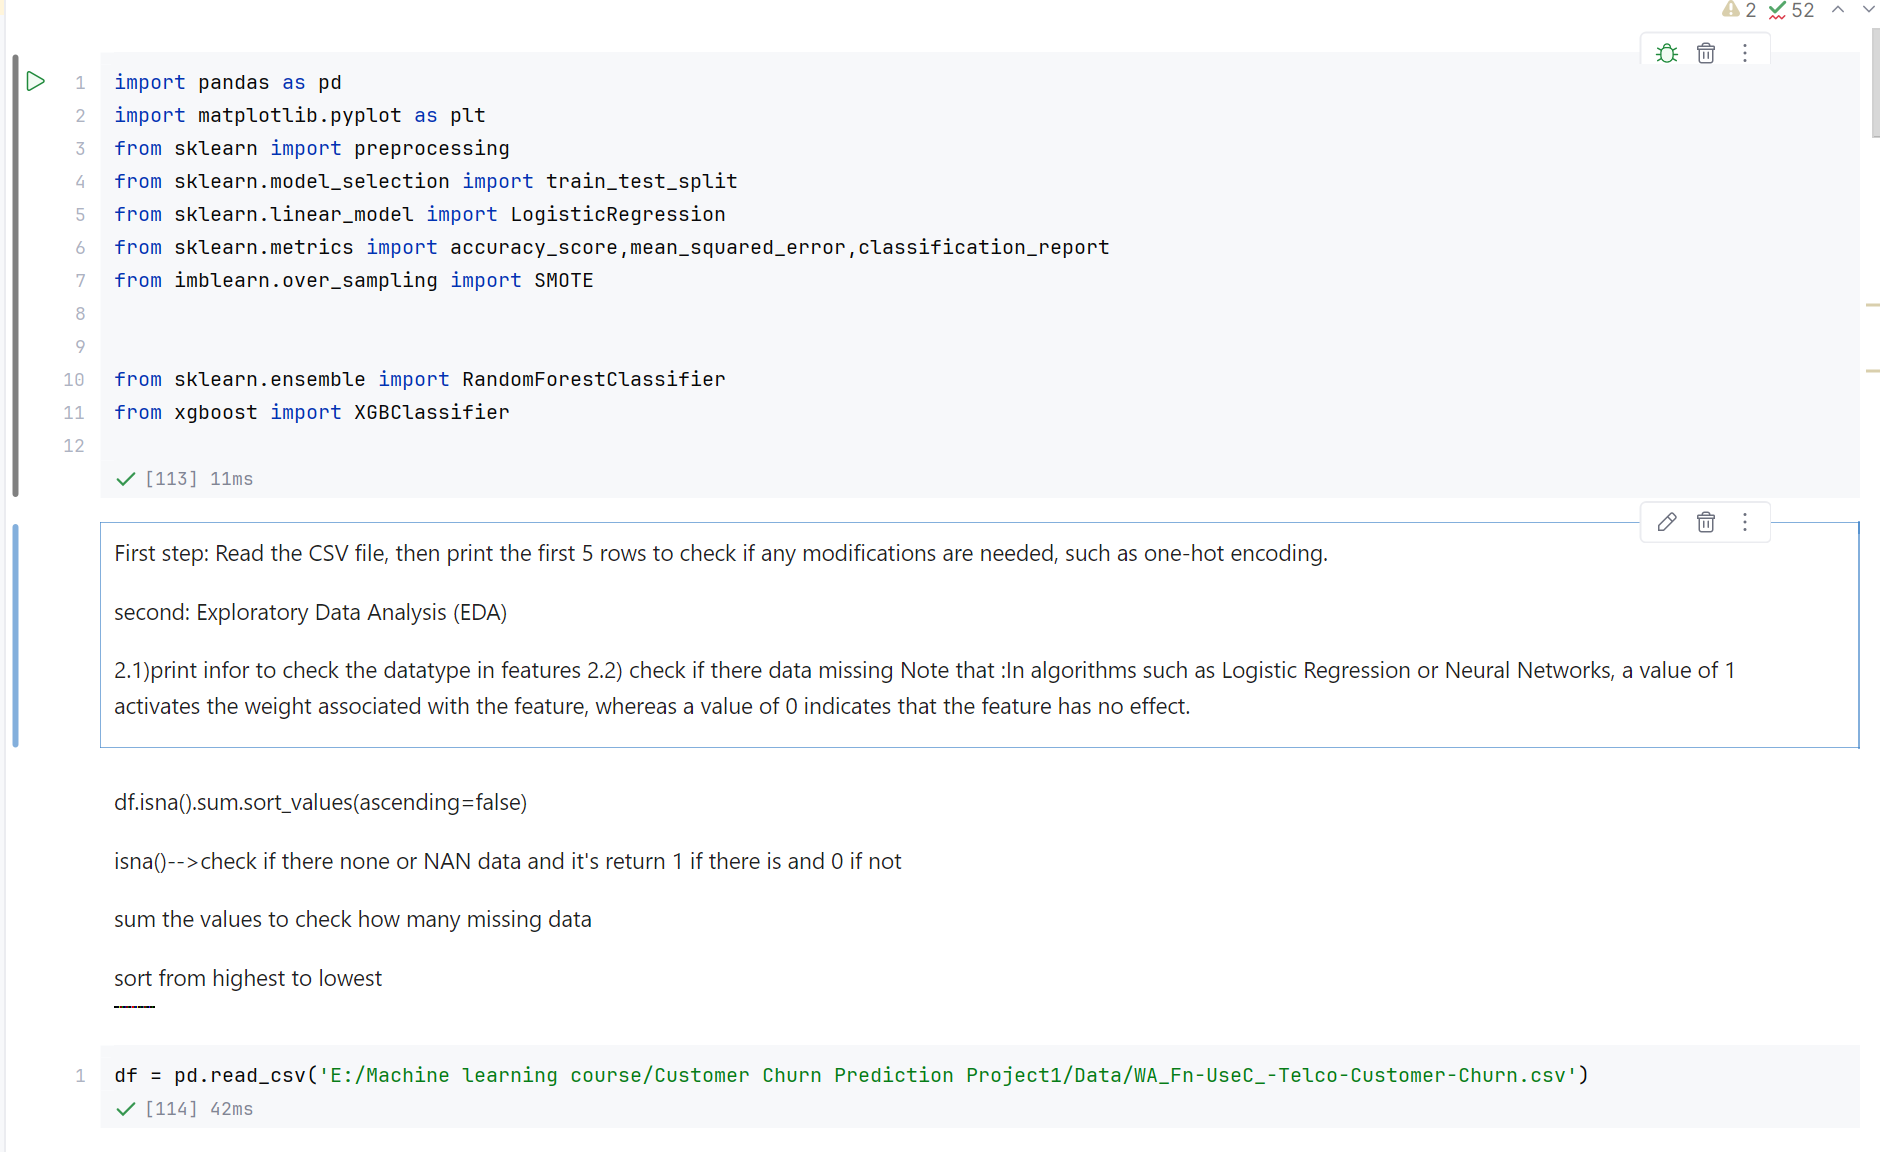

In [ ]:
df = pd.read_csv('E:/Machine learning course/Customer Churn Prediction Project1/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
print(df.head())

In [ ]:
print(df[~df['OnlineSecurity'].isin(['Yes', 'No'])]['OnlineSecurity'])


In [ ]:
df['Churn'].value_counts(normalize=True)


In [ ]:
df.info()


isna() → checks if there are any NaN (missing) values. It returns 1 if a value is missing, and 0 otherwise.

sum() → counts the total number of missing values in each column.

sort_values(ascending=False) → sorts the columns from the highest to lowest number of missing values.

In [ ]:

x=df.isna().sum().sort_values(ascending=False)
print(x)
print('_'*50)
df.duplicated().sum()


In [ ]:
pd.set_option('display.max_columns',None)

df.head()

First, apply one-hot encoding to convert all categorical variables into numerical form. Then, transform any Yes/No values into binary format (0 and 1). Using dtype=int in the one-hot encoding step ensures the output is represented as 0 and 1 instead of True and False. This is not strictly necessary, since Boolean values (True/False) are also interpreted as numerical (1 and 0), but using integers makes the data more consistent and easier to work with.

In [ ]:
df=df.drop('customerID',axis=1)

variables_edit=['gender','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','OnlineBackup','StreamingMovies']
Variables_yes_or_no=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
df['TotalCharges']=df['TotalCharges'].replace(' ',0)
df['TotalCharges']=df['TotalCharges'].astype(float)
df[Variables_yes_or_no] = df[Variables_yes_or_no].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
df=pd.get_dummies(data=df,prefix=variables_edit,columns=variables_edit,dtype=int)

In [ ]:
df.info()
print('_'*50)
df.head()
df.isnull().sum().sort_values(ascending=False)


After checking, I discovered that OnlineSecurity, DeviceProtection, TechSupport, OnlineBackup, StreamingTV, and StreamingMovies do not only contain Yes/No values, but also other categories such as No internet service.

So I considered two solutions:

1-->If a value contains Yes or No as part of the text, treat it as a Yes/No category.

2-->Apply one-hot encoding to represent all categories properly.

I chose the second solution (one-hot encoding)

In [ ]:
df['Churn'].value_counts(normalize=True)

In [ ]:
df.describe()


Analyze the data to check the relationship between each column and the target variable.

In [ ]:
Topfeatures={}
def churn_precentage(df, target='Churn'):
    for col in df.columns:
        if col== target:
            continue
        print(f'-------------{col}-------')
        if df[col].dtypes in ['object','bool'] or df[col].nunique()<=10:
            rate=df.groupby(col)[target].agg(['count', 'mean']).round(2)
            rate['Churn_Percentage'] = (rate['mean']*100).round(1)
            print(rate.sort_values('Churn_Percentage', ascending=False))


        else:

           ranges_grouped=df.groupby(pd.cut(df[col],bins=4))[target].agg(['count', 'mean']).round(2)
           ranges_grouped['Churn_Percentage'] = (ranges_grouped['mean']*100).round(1)
           print(ranges_grouped.sort_values('Churn_Percentage', ascending=False))



    print("\n" + "="*50 + "\n")



In [ ]:
churn_precentage(df)


Divde the data to this form:

60% of data to be training data

20% of data to be evluating data

20% data to be test data

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.20,random_state=1)


In [ ]:
print(f'x train shape: {x_train.shape}, x_cv shape: {x_cv.shape}, x_test shape: {x_test.shape}\n y train shape: {y_train.shape}, y_cv shape: {y_cv.shape} ,y_test shape: {y_test.shape}')

In [ ]:
scaling_data=['tenure','MonthlyCharges','TotalCharges']
scaler = preprocessing.StandardScaler()

In [ ]:
x_train[scaling_data] = scaler.fit_transform(x_train[scaling_data])
x_cv[scaling_data] = scaler.transform(x_cv[scaling_data])
x_test[scaling_data] = scaler.transform(x_test[scaling_data])

In [ ]:
x_test.head()

In [ ]:
log=LogisticRegression(max_iter=1000)
log.fit(x_train,y_train)
y_pred=log.predict(x_train)


In [ ]:
accuracy=accuracy_score(y_train,y_pred)


In [ ]:
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, y_pred) / 2}")


In [ ]:
print(f'accuracy for training data {accuracy}')


In [ ]:
y_evl_predict=log.predict(x_cv)
mean_squared_errorevl=mean_squared_error(y_cv,y_evl_predict)
Cost_cv=mean_squared_errorevl/2
print(Cost_cv)

In [ ]:
accuracyevl=accuracy_score(y_cv,y_evl_predict)

In [ ]:
print(f'accuracy for training data {accuracyevl}')


In [ ]:
y_test_predict=log.predict(x_test)
accuracytest=accuracy_score(y_test,y_test_predict)

In [ ]:
print(f'accuracy for training data {accuracytest}')


In [ ]:
classification_reporttrain=classification_report(y_train,y_pred)
print(classification_reporttrain)

In [ ]:
classification_reportevl=classification_report(y_cv,y_evl_predict)
print(classification_reportevl)

Instead of simply duplicating samples from the minority class (as in traditional oversampling), SMOTE (Synthetic Minority Over-sampling Technique) generates new synthetic samples in a more realistic way.

The process works as follows:

Select a sample from the minority class.

Identify one of its nearest neighbors (also from the minority class).

Generate a new synthetic sample at a point along the line segment connecting the two samples.

By interpolating between existing samples, SMOTE increases the representation of the minority class in the dataset while preserving the feature space structure, rather than merely replicating existing data points.


In [ ]:
smote=SMOTE(random_state=42)
x_trainSM,y_trainSM=smote.fit_resample(x_train,y_train)

In [ ]:
log=LogisticRegression(max_iter=1000,class_weight='balanced')
log.fit(x_trainSM,y_trainSM)
y_pred=log.predict(x_trainSM)

In [ ]:
accuracy=accuracy_score(y_trainSM,y_pred)


In [ ]:
classification_reporttrain=classification_report(y_pred,y_trainSM)
print(classification_reporttrain)

In [ ]:
print(f'----------------------------------Random Forest----------------------------------')

In [ ]:
print(f'x shape{x.shape}\ny shape{y.shape}')

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [ ]:
adasyn= ADASYN(random_state=42)
X_trainAD,Y_trainAD=adasyn.fit_resample(X_train,Y_train)

In [ ]:
print(X_test.shape)

In [ ]:
min_samples_listR=[2,10,50,80,90,100,200,300,400,500]
Max_depth_lisrT=[1,2,3,4,5,6,10,50,60,None]
N_estR=[10,20,50,80,100,200,300,500]

In [ ]:
accuracy_train=[]
accuracy_test=[]
for i in min_samples_listR:
    model=RandomForestClassifier(min_samples_split=i, random_state=55)
    model.fit(X_trainAD,Y_trainAD)
    y_pred_train=model.predict(X_trainAD)
    y_pred_test=model.predict(X_test)
    accuracy_Train=accuracy_score(Y_trainAD,y_pred_train)
    accuracy_Test=accuracy_score(Y_test,y_pred_test)
    accuracy_train.append(accuracy_Train)
    accuracy_test.append(accuracy_Test)
plt.title('Random Forest Classifier minsamples')
plt.xlabel('minsample')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_listR)), labels=min_samples_listR)
plt.plot(accuracy_train,label='accuracy')
plt.plot(accuracy_test,label='accuracy')
plt.legend()


In [ ]:
accuracy_Train_MaxDepth=[]
accuracy_Test_MaxDepth=[]
for i in Max_depth_lisrT:
    model=RandomForestClassifier(max_depth=i, random_state=55)
    model.fit(X_trainAD,Y_trainAD)
    Ytrain_pred=model.predict(X_trainAD)
    Ytest_pred=model.predict(X_test)
    accuracyTrain=accuracy_score(Y_trainAD,Ytrain_pred)
    accuracyTest=accuracy_score(Y_test,Ytest_pred)
    accuracy_Train_MaxDepth.append(accuracyTrain)
    accuracy_Test_MaxDepth.append(accuracyTest)

plt.title('Random Forest Classifier Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(Max_depth_lisrT)), labels=Max_depth_lisrT)
plt.plot(accuracy_Train_MaxDepth,label='training accuracy')
plt.plot(accuracy_Test_MaxDepth,label='testing accuracy')
plt.legend()
plt.plot(accuracy_Test_MaxDepth,label='accuracy')



In [ ]:
accuracy_Train_Nest=[]
accuracy_Test_Nest=[]
for i in N_estR:
    model=RandomForestClassifier(n_estimators=i, random_state=55)
    model.fit(X_trainAD,Y_trainAD)
    Ytrain_pred=model.predict(X_trainAD)
    Ytest_pred=model.predict(X_test)
    accuracyTrain=accuracy_score(Y_trainAD,Ytrain_pred)
    accuracyTest=accuracy_score(Y_test,Ytest_pred)
    accuracy_Train_Nest.append(accuracyTrain)
    accuracy_Test_Nest.append(accuracyTest)
plt.title('Random Forest Classifier N estimators')
plt.xlabel(' Number of estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(N_estR)), labels=N_estR)
plt.plot(accuracy_Train_Nest,label='training accuracy')
plt.plot(accuracy_Test_Nest,label='testing accuracy')
plt.legend()



Min sample= 50

max Depth=10

N estimator =50




In [ ]:
model=RandomForestClassifier(min_samples_split=50,max_depth=10,n_estimators=50,random_state=55)
model.fit(X_trainAD,Y_trainAD)
XTrain_Pred=model.predict(X_trainAD)
XTest_Pred=model.predict(X_test)
accuracyTrain=accuracy_score(Y_trainAD,XTrain_Pred)
accuracyTest=accuracy_score(Y_test,XTest_Pred)
print(f'Accuracy for training data {accuracyTrain}, Accuracy for testing data {accuracyTest}')

In [ ]:
print(f'Analysis for Random forest accuracy \n {classification_report(Y_trainAD,XTrain_Pred)}\n for test data {classification_report(Y_test,XTest_Pred)}')

In [ ]:
n=int(len(X_trainAD)*0.8)


In [ ]:
print(f' all training model {X_trainAD.shape}\n the X data after spliting {X_trainAD[:n].shape}\n X data evluation {X_trainAD[n:].shape}')
print("_"*100)
print(f' all target data {Y_trainAD.shape}\n the Y data after spliting {Y_trainAD[:n].shape}\n Y data evluation {Y_trainAD[n:].shape}')

In [ ]:
x_trainfit,x_traineval,y_trainfit,y_traineval=X_trainAD[:n],X_trainAD[n:],Y_trainAD[:n],Y_trainAD[n:]

In [ ]:
XGBoostModel=XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=55,verbosity=1,early_stopping_rounds=50)
XGBoostModel.fit(x_trainfit,y_trainfit,eval_set=[(x_traineval,y_traineval)])

In [ ]:
XGBoostModel.best_iteration

In [ ]:
XG_train_pred=XGBoostModel.predict(X_trainAD)
XG_test_pred=XGBoostModel.predict(X_test)
XGBaccuracyTrain=accuracy_score(Y_trainAD,XG_train_pred)
XGBaccuracyTest=accuracy_score(Y_test,XG_test_pred)
print(f'Xgboost model training accuracy {XGBaccuracyTrain}, Xgboost model testing accuracy {XGBaccuracyTest}')

In [ ]:
print(f'Analysis for XGboost accuracy \n {classification_report(Y_trainAD,XG_train_pred)}\n for test data {classification_report(Y_test,XG_test_pred)}')